In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def table_reader(file_name):
    data = pd.read_csv(file_name, delimiter=' ', header=10)
    data.drop(data.columns[[0]], axis=1, inplace=True)

    return data

In [3]:
sim_file = "FITOPT000.FITRES"

sim_info = table_reader(sim_file)

sim_info.head()

,CID,CIDint,IDSURVEY,TYPE,FIELD,CUTFLAG_SNANA,zHEL,zHELERR,zCMB,zCMBERR,...,m0obs_r,m0obs_i,m0obs_g,m0obs_z,em0obs_i,em0obs_r,em0obs_g,em0obs_z,z,Unnamed: 60
0,1186139,1186139,10,101,X2,1,0.44326,0.0005,0.44211,0.0005,...,22.2633,22.2680,23.3940,22.3867,0.026228,0.033131,0.075211,0.037586,0.44326,NaN
1,29515665,29515665,10,101,C2,1,0.52269,0.0005,0.52213,0.0005,...,22.5660,22.6829,23.7492,22.6676,0.035247,0.046204,0.106400,0.047141,0.52269,NaN
2,32259709,32259709,10,101,X3,1,0.27415,0.0005,0.27313,0.0005,...,21.6710,21.7517,21.8663,0.0000,0.041018,0.034222,0.066053,0.000000,0.27415,NaN
3,25558110,25558110,10,101,X3,1,1.17297,0.0005,1.17124,0.0005,...,26.6622,25.0045,0.0000,24.2447,0.096627,0.253400,0.000000,0.084675,1.17297,NaN
4,4111967,4111967,10,101,S2,1,0.49967,0.0005,0.49855,0.0005,...,22.6461,22.7541,23.9062,22.7385,0.037261,0.049172,0.113400,0.051160,0.49967,NaN


In [4]:
sim_info.columns.values

array(['CID', 'CIDint', 'IDSURVEY', 'TYPE', 'FIELD', 'CUTFLAG_SNANA',
       'zHEL', 'zHELERR', 'zCMB', 'zCMBERR', 'zHD', 'zHDERR', 'VPEC',
       'VPECERR', 'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'SNRMAX1',
       'SNRMAX2', 'SNRMAX3', 'PKMJD', 'PKMJDERR', 'x1', 'x1ERR', 'c',
       'cERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0',
       'COV_c_x0', 'NDOF', 'FITCHI2', 'FITPROB', 'SIM_TYPE_INDEX',
       'SIM_NONIA_INDEX', 'SIM_LIBID', 'SIM_NGEN_LIBID', 'SIM_ZCMB',
       'SIM_VPEC', 'SIM_DLMAG', 'SIM_PKMJD', 'SIM_x1', 'SIM_c',
       'SIM_alpha', 'SIM_beta', 'SIM_x0', 'SIM_mB', 'SIM_AV', 'm0obs_r',
       'm0obs_i', 'm0obs_g', 'm0obs_z', 'em0obs_i', 'em0obs_r',
       'em0obs_g', 'em0obs_z', 'z', 'Unnamed: 60'], dtype=object)

We are interested in salt parameters:
- $\alpha$ and $\beta$
- stretch $x_0$, peak $x_1$ and color $c$

these parameters are important for light-curves simulations

In [4]:
print('\u03B1:', sim_info['SIM_alpha'].value_counts(), sep='\n')

print('\n')

print('\u03B2:', sim_info['SIM_beta'].value_counts(), sep='\n')

α:
SIM_alpha
 0.144    479183
-9.000    402786
Name: count, dtype: int64


β:
SIM_beta
 3.1    479183
-9.0    402786
Name: count, dtype: int64


### - - -
ok

she only used two configurations:

- $\alpha = 0.144$ and $\beta = 3.1$
- $\alpha = -9.0$ and $\beta = -9.0$
### - - -

## $x_0$

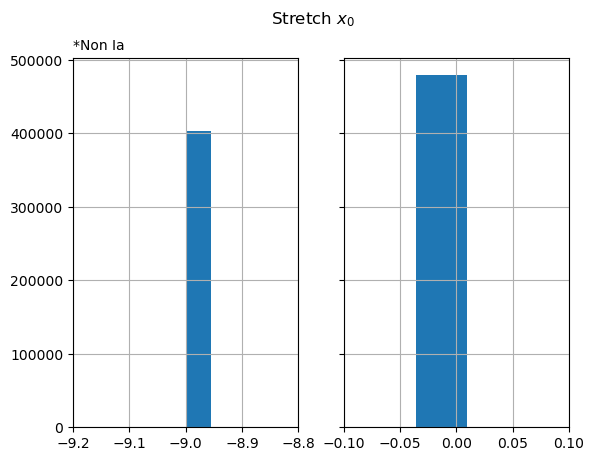

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
bins = 200

sim_info['SIM_x0'].hist(bins=bins, ax=ax2)
ax2.set_xlim(-0.1, 0.1)

sim_info['SIM_x0'].hist(bins=bins, ax=ax1)
ax1.set_xlim(-9.2, -8.8)
ax1.set_title('*Non Ia', fontsize=10, loc='left')

fig.suptitle(r'Stretch $x_0$')

plt.show()

In [6]:
x_0s = sim_info[sim_info['SIM_x0']!=-9]['SIM_x0']

print(
    f"""
    x_0
    ====

    mean: {x_0s.mean()}
    \u03C3 : {x_0s.std()}

    x_0 \u2208 [{min(x_0s)}, {max(x_0s)}]
    """
)


    x_0
    ====

    mean: 2.260240041977074e-05
    σ : 9.183332256887107e-05

    x_0 ∈ [9.05941e-07, 0.00943271]
    


## $x_1$

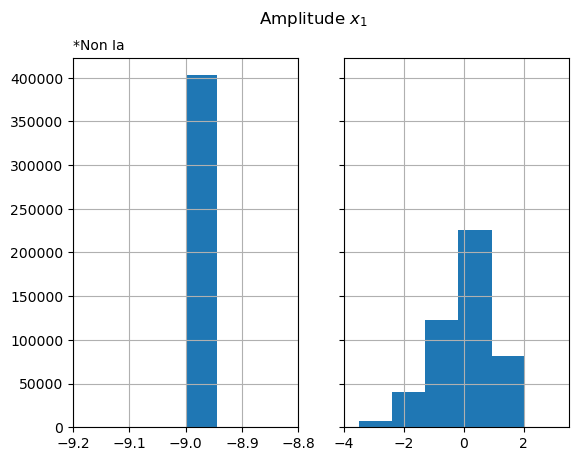

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
bins = 200

sim_info['SIM_x1'].hist(bins=10, ax=ax2)
ax2.set_xlim(-4, 3.5)

sim_info['SIM_x1'].hist(bins=bins, ax=ax1)
ax1.set_xlim(-9.2, -8.8)

ax1.set_title('*Non Ia', fontsize=10, loc='left')

fig.suptitle(r'Amplitude $x_1$')

plt.show()

In [9]:
x_1s = sim_info[sim_info['SIM_x1']!=-9]['SIM_x1']

print(
    f"""
    x_1
    ====

    mean: {x_1s.mean()}
    \u03C3 : {x_1s.std()}

    x_1 \u2208 [{min(x_1s)}, {max(x_1s)}]
    """
)


    x_1
    ====

    mean: 0.02896019717086712
    σ : 0.9380992739270394

    x_1 ∈ [-4.92005, 2.031]
    


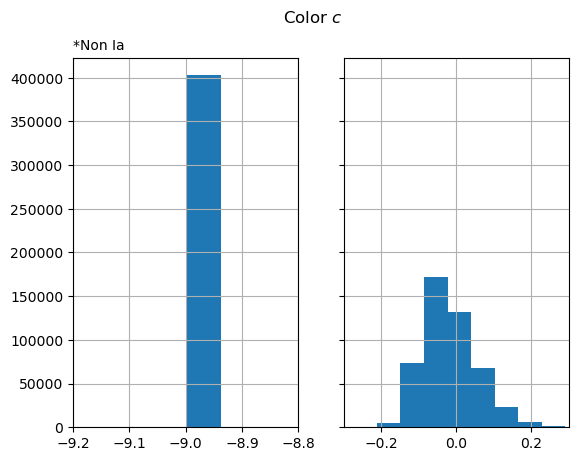

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

bins = 150
sim_info['SIM_c'].hist(bins=bins, ax=ax2)
ax2.set_xlim(-0.3, 0.3)

sim_info['SIM_c'].hist(bins=bins, ax=ax1)
ax1.set_xlim(-9.2, -8.8)
ax1.set_title('*Non Ia', fontsize=10, loc='left')

fig.suptitle(r'Color $c$')

plt.show()

In [11]:
cs = sim_info[sim_info['SIM_c']!=-9]['SIM_c']

print(
    f"""
    c
    ====

    mean: {cs.mean()}
    \u03C3 : {cs.std()}

    c \u2208 [{min(cs)}, {max(cs)}]
    """
)


    c
    ====

    mean: -0.01779326120378345
    σ : 0.071126724637763

    c ∈ [-0.259818, 0.4163]
    


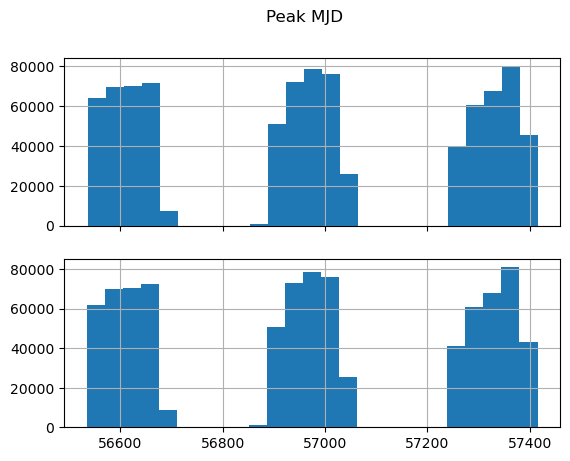

In [12]:
fig, (ax1, ax2)= plt.subplots(nrows=2, sharex=True)

bins = 25
sim_info['SIM_PKMJD'].hist(bins=bins, ax=ax2)
sim_info['PKMJD'].hist(bins=bins, ax=ax1)

fig.suptitle(r'Peak MJD')

plt.show()

In [7]:
sim_info['SIM_TYPE_INDEX'].value_counts()

SIM_TYPE_INDEX
1     479183
32    140197
20     94994
33     70811
23     66818
22     26717
21      3249
Name: count, dtype: int64

In [14]:
print(
    f"""
    Non Ia  : {sum(sim_info['SIM_TYPE_INDEX'] != 1)}
    
    x_0 = -9: {sum(sim_info['SIM_x0'] == -9)}
    x_1 = -9: {sum(sim_info['SIM_x1'] == -9)}
    c   = -9: {sum(sim_info['SIM_c'] == -9)}
    """
)



    Non Ia  : 402786
    
    x_0 = -9: 402786
    x_1 = -9: 402786
    c   = -9: 402786
    


<AxesSubplot:>

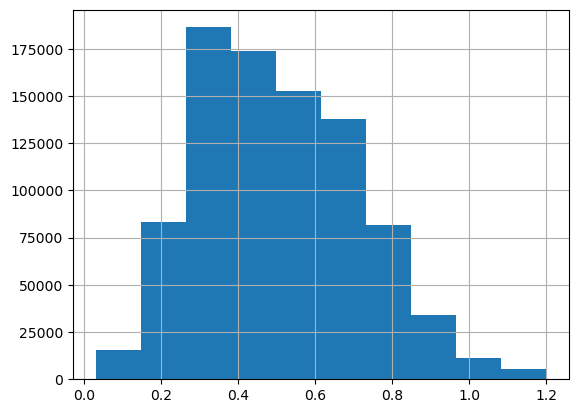

In [15]:
sim_info['z'].hist()

In [16]:
sim_info['z'].std()

0.20729233750921763